In [1]:
import json
import os
import cv2
import numpy as np
from tqdm import tqdm
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils


ROOT_DIR = './data/MuLV'
json_file = './data/MuLV/instance_train2021.json'


coco  = COCO(json_file)

catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)
print(cats)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
[{'id': 1, 'name': 'obj_1', 'supercategory': 'particles'}, {'id': 2, 'name': 'obj_2', 'supercategory': 'particles'}, {'id': 3, 'name': 'obj_3', 'supercategory': 'particles'}]


Number of images containing all the  classes: 33


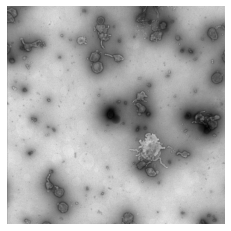

In [32]:
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Define the classes (out of the 81) which you want to see. Others will not be shown.
filterClasses = ['laptop', 'tv', 'cell phone']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses) 
# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)
print("Number of images containing all the  classes:", len(imgIds))

# load and display a random image
img = coco.loadImgs(imgIds[6])[0]
I = io.imread('{}/gray/{}'.format(ROOT_DIR,img['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

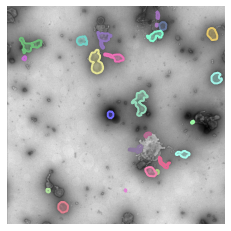

In [33]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)